# New Dataset

Let's try out our classifier on a different dataset (found on Kaggle) to determine whether our first dataset had any bias and if the classifier is still effective on this new dataset.

In [1]:
# Read in our new dataset. Dataset consists of two files, one for fake news and one for true news.

import pandas as pd

df_fake = pd.read_csv('Fake.csv')
df_real = pd.read_csv('True.csv')

In [2]:
# Binary classification, 0 for fake and 1 for real.

df_fake['label'] = 0
df_real['label'] = 1

In [3]:
# Combining into one dataframe.

df = pd.concat([df_fake, df_real])
df = df.reset_index()
df = df.drop(df.columns[0],axis=1)
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


Now for a bit of analysis on our new dataset. This dataset has two extra features compared to our previous dataset; subject and date.

In [4]:
year_counts = {}
for date in df['date']:
    year = date[-5:]
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1
year_counts    

{' 2017': 9203,
 ' 2016': 11754,
 'eb-18': 35,
 'dier/': 1,
 ' 2015': 2479,
 '-pie/': 1,
 'left/': 1,
 't.jpg': 3,
 'd.jpg': 3,
 'ideo]': 1,
 '2017 ': 16701,
 '2016 ': 4716}

In [5]:
print('Number of articles from 2015: {} ({}%)'.format(2479,round(2479/len(df)*100,3)))
print('Number of articles from 2016: {} ({}%)'.format(11754+4716,round((11754+4716)/len(df)*100,3)))
print('Number of articles from 2017: {} ({}%)'.format(9203+16701,round((9203+16701)/len(df)*100,3)))
print('Number of articles from 2018: {} ({}%)'.format(35,round(35/len(df)*100,3)))

Number of articles from 2015: 2479 (5.521%)
Number of articles from 2016: 16470 (36.683%)
Number of articles from 2017: 25904 (57.695%)
Number of articles from 2018: 35 (0.078%)


So we see that the majority of articles in our dataset are from 2016 and 2017.

In [6]:
df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

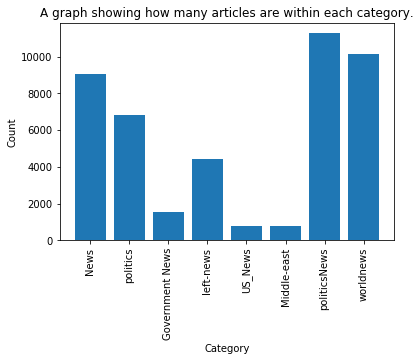

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
subject_counts = Counter(df['subject'])
plt.bar(subject_counts.keys(),subject_counts.values())
plt.title('A graph showing how many articles are within each category.')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

It doesn't seem that these categories are going to be particularly useful in the classification of our news articles, so we shall not use them in our classifier.

## Data pre-processing

We are now going to pre-process the data into a format which we can then input into a machine learning classification algorithm.

In [9]:
# Combining the title and text into one column.

df['news'] = df['title'] + ' ' + df['text']

## Text pre-processing

Time to pre-process our text. We can use the same code as for the original dataset. However as this dataset is much larger it takes longer to complete the text pre-processing ( $\approx20$ minutes).

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

# Creating a list of stopwords (common words which are not important to the overall meaning of the article).
stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])

# Lemmatization is the process of reducing words to their basic form, e.g. dogs->dog, running->run.
WNL = WordNetLemmatizer()

# We now iterate through each article in the dataset.
for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    # Removing all punctuation using RegEx.
    article = re.sub(r'[^\w\s]', '', article)
    # Tokenization: changing the article from one continuous string to a list of tokens (words).
    words = [word.lower() for word in nltk.word_tokenize(article)]
    # Removing stopwords.
    words = [word for word in words if not word in stop_words]
    # Lemmatization and concatenating the words back into a single string.
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    
    # Replace the article with the new filtered version.
    df.loc[index, 'news'] = filtered_article
    
df.head()

,title,text,subject,date,label,news
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,trump obsessed even obamas name coded website ...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis called donald trump christmas spe...


## Vectorization

We are going to use the same tf-idf vectorizer as for the original dataset.

In [14]:
# First let's split our dataframe into an input and output list. Our corpus to vectorize is df_input.
df_input = df['news']
df_output = df['label']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(df_input)
tf_idf_matrix

<44898x222161 sparse matrix of type '<class 'numpy.float64'>'
	with 7365813 stored elements in Compressed Sparse Row format>

## Logistic Regression

Now that we have pre-processed our data, we can input it into a logistic regression model.

In [16]:
# We are performing a 75:25 split.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='sag',penalty='none')

logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
logreg.predict(x_test[0:10])

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [30]:
accuracy = logreg.score(x_test, y_test)
accuracy

0.9943875278396437

Wow that is a pretty high accuracy score! 99.4%

In [31]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,logreg.predict(x_test))
confusion_matrix

array([[5862,   33],
       [  30, 5300]])

Clearly this new dataset improves the accuracy of our linear regression model by quite a bit, roughly an 8% increase in accuracy compared to the original dataset.

That's great news. Now let's do some analysis on this new dataset to try to understand why it performs better.

## Data analysis

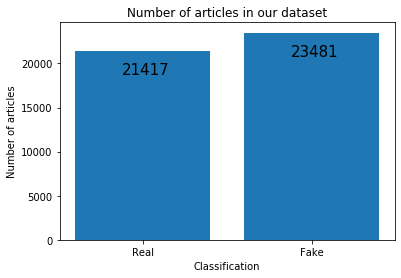

In [36]:
# Ratio of fake to real.
import matplotlib.pyplot as plt

x = ['Real','Fake']
y = [len(df[df['label']==1]),len(df[df['label']==0])]
plt.bar(x,y)
plt.title('Number of articles in our dataset')
plt.xlabel('Classification')
plt.ylabel('Number of articles')
plt.text(-0.12,18800,str(len(df[df['label']==1])),fontsize=15)
plt.text(0.88,20800,str(len(df[df['label']==0])),fontsize=15)
plt.show()

Our dataset is relatively even in terms of the classification of the news articles, with slightly more being fake.

#### Word count

In [39]:
# Creating dictionaries for word counts

word_count_fake = {}
word_count_real = {}
for index, row in df.iterrows():
    if row['label'] == 1:
        sentence = row['news']
        words = nltk.word_tokenize(sentence)
        for word in words:
            if word in word_count_real:
                word_count_real[word] += 1
            else:
                word_count_real[word] = 1
    else:
        sentence = row['news']
        words = nltk.word_tokenize(sentence)
        for word in words:
            if word in word_count_fake:
                word_count_fake[word] += 1
            else:
                word_count_fake[word] = 1

In [41]:
word_count_fake_df = pd.DataFrame(word_count_fake.items(), columns = ['word','count'])
word_count_fake_df = word_count_fake_df.sort_values(by='count',ascending=False).reset_index().drop('index',axis=1)

word_count_real_df = pd.DataFrame(word_count_real.items(), columns = ['word','count'])
word_count_real_df = word_count_real_df.sort_values(by='count',ascending=False).reset_index().drop('index',axis=1)

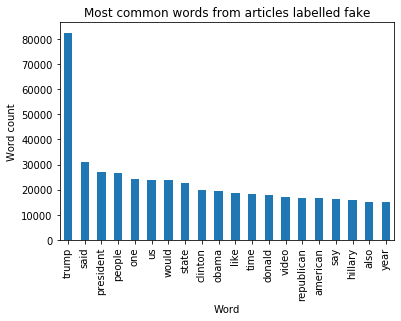

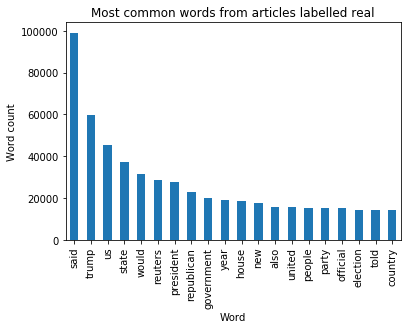

In [42]:
bar_graph_fake = word_count_fake_df.head(20).plot.bar(x='word',legend=None)
plt.title('Most common words from articles labelled fake')
plt.ylabel('Word count')
plt.xlabel('Word')
plt.show()

bar_graph_real = word_count_real_df.head(20).plot.bar(x='word',legend=None)
plt.title('Most common words from articles labelled real')
plt.ylabel('Word count')
plt.xlabel('Word')
plt.show()

One thing that stands out is that the uncommon word 'reuters' is so high up in the list of most common words used in the real news articles. This is because the majority of the articles were scraped from the Reuters news webpage. This is an unfair indicator to our model, as it is tricking it into classifying any article with the word 'reuters' in as real, which seemingly makes our model very accurate, however this accuracy may not be transferred to unseen news articles which do not mention this word.

So to counteract this we shall remove all mentions of the word 'reuters' from all articles.

In [49]:
for index, row in df.iterrows():
    reuters_removed = ''
    article = row['news']
    words = [word for word in nltk.word_tokenize(article) if word != 'reuters']
    reuters_removed = " ".join([word for word in words])
    df.loc[index, 'news'] = reuters_removed

In [52]:
# Running our logistic regression model on new dataset with 'reuters' removed.

df_input = df['news']
df_output = df['label']
tf_idf_matrix = vectorizer.fit_transform(df_input)
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, random_state=42)
logreg.fit(x_train, y_train)
logreg.score(x_test,y_test)

/Users/maxkirwan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9920712694877506

So it seems that removing the word 'reuters' does not have much affect. Perhaps the logistic regression model is just extremely accurate for this dataset.

Now let's try it out on some unseen articles.

In [54]:
def article_preprocessor (article):
    filtered_article = ''
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    return filtered_article

In [55]:
def logreg_classifier (list_of_articles):
    
    # Pre-process the articles
    articles_pp = [article_preprocessor(article) for article in list_of_articles]
    
    # Append new articles to original list of articles (df_input)
    new_input = df_input.append(pd.Series(articles_pp))
    
    # Vectorisation of new_input
    tf_idf_matrix = vectorizer.fit_transform(new_input)
    
    # Split matrix into original dataset and new data
    orig_data_matrix = tf_idf_matrix[:len(df_input)]
    new_data_matrix = tf_idf_matrix[len(df_input):]
    
    # Now perform logistic regression on original dataset
    x_train, x_test, y_train, y_test = train_test_split(orig_data_matrix, df_output, random_state=42)
    logreg = LogisticRegression(solver='lbfgs')
    logreg.fit(x_train, y_train)
    accuracy = logreg.score(x_test,y_test)
    print('Logistic regression model accuracy: ' + str(accuracy))
    # The model can now classify the new data
    predictions = logreg.predict(new_data_matrix)
    
    return predictions

In [56]:
# The top news story on the BBC
bbc_news_article = '''The furlough scheme will be extended until the end of September by the chancellor in the Budget later.
Rishi Sunak said the scheme - which pays 80% of employees' wages for the hours they cannot work in the pandemic - would help millions through "the challenging months ahead".
Some 600,000 more self-employed people will also be eligible for government help as access to grants is widened.
But Labour said the support schemes should have been extended "months ago".
Mr Sunak will outline a three-point plan to support people through the coming months, rebuild the economy and "fix" the public finances in the wake of the pandemic when he delivers his statement to the Commons at about 12:30 GMT.
But he has warned of tough economic times ahead and there are reports that he plans to raise some taxes.'''

# Here's a fake news article from the New York Mag
fake_article = '''Twelve days out from judgment day in an election in which he continues to trail badly, President Trump continues to hammer home an issue that will surely resonate with that small slice of still-undecided voters: his supposedly unfair treatment at the hands of CBS’s Lesley Stahl. After two days of promising to release unedited footage of an as-yet-unaired 60 Minutes interview, during which he walked out prematurely because he was upset with Stahl’s line of questioning, the president finally followed through on Thursday. Throughout the interview, Stahl presses Trump on issues from health care (the president says he hopes the Supreme Court strikes down Obamacare, a politically toxic position) to his derogatory comments about Anthony Fauci (Trump claims he was misinterpreted) to his false claims that the Obama campaign spied on him. The tone is of an adversarial back-and-forth, well within normal journalistic bounds. Nevertheless, Trump continuously claims that Joe Biden hasn’t been given similar treatment by CBS and cuts the proceedings short.'''

In [57]:
articles = [bbc_news_article,fake_article]
logreg_classifier(articles)

Logistic regression model accuracy: 0.98271714922049


array([1, 0])